<a href="https://colab.research.google.com/github/kursatkara/MAE_5020_Spring_2025/blob/master/03_33_SVD_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Regression Model for Housing Data

In [1]:
# Example from the textbook.

import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams.update({'font.size': 12})

In [2]:
# Load data matrix
H = np.genfromtxt('https://raw.githubusercontent.com/kursatkara/MAE_5020_S24/master/Data/housing.data')
print(H.shape, H.size)

b = H[:,-1] # housing values in $1000s
print(b.shape, b.size)

A = H[:,:-1] # other factors
print(A.shape, A.size)

# Pad with ones for nonzero offset
# Add a new column on the right side of A, filled entirely with the value 1.
# The shape of A after this operation will be (506, 14),
# since it originally had 13 columns and one column is added.
# To ofset the housing price.
A = np.pad(A,[(0,0),(0,1)],mode='constant',constant_values=1)


# SVD
U, S, VT = np.linalg.svd(A,full_matrices=False)

# Solve Ax=b using SVD
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

(506, 14) 7084
(506,) 506
(506, 13) 6578


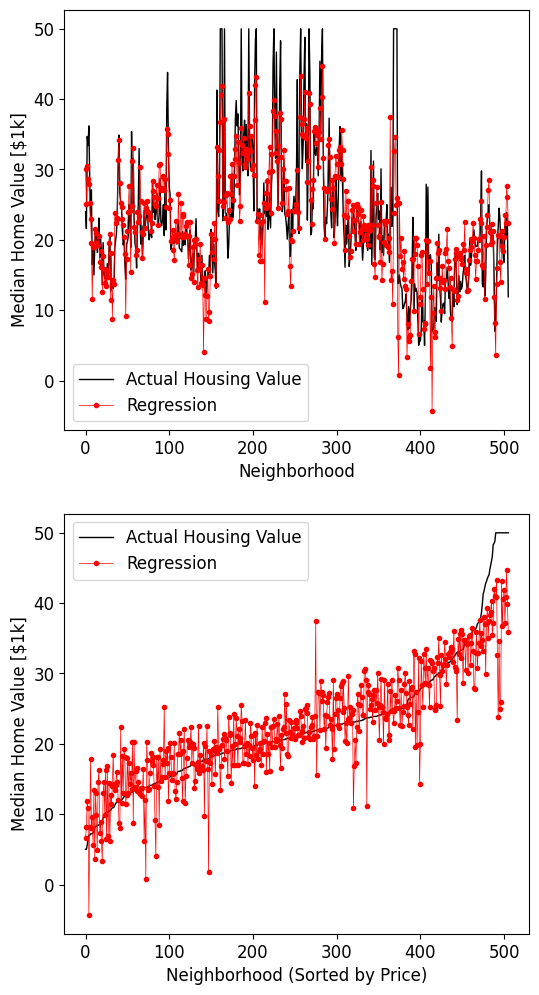

In [3]:
# Plotting
plt.rcParams['figure.figsize'] = [6, 12]

fig = plt.figure()
ax1 = fig.add_subplot(211)

plt.plot(b  , color='k', linewidth=1, label='Actual Housing Value') # True relationship
plt.plot(A@x, '-o', color='r', linewidth=0.5, markersize=3, label='Regression')
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1k]')
plt.legend()

ax2 = fig.add_subplot(212)
sort_ind = np.argsort(H[:,-1])
plt.plot(b[sort_ind]    , color='k', linewidth=1, label='Actual Housing Value') # True relationship
plt.plot(A[sort_ind,:]@x, '-o', color='r', linewidth=0.5, markersize=3, label='Regression')
plt.xlabel('Neighborhood (Sorted by Price)')
plt.ylabel('Median Home Value [$1k]')
plt.legend()

plt.show()

Mean Normalization

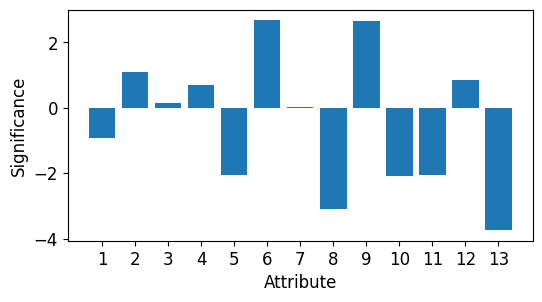

In [4]:
plt.rcParams['figure.figsize'] = [6, 3]

# Calculate the mean of each column in A
A_mean = np.mean(A,axis=0)
#print(A_mean.shape)

# A_mean is reshaped from having shape (n,) to (n, 1)
A_mean = A_mean.reshape(-1, 1)
#print(A_mean.shape)

# The following is a common data preprocessing step (a form of normalization)
# that ensures each column (feature) has comparable scale.

# Subtract the mean of each column from all elements in that column of matrix A.
A2 = A - np.ones((A.shape[0],1)) @ A_mean.T

# Iterate through all columns of A except the last one which is padded for offset
for j in range(A.shape[1]-1):
#   This calculates the standard deviation of the j-th column.
    A2std = np.std(A2[:,j])
#   Effectively, each column is scaled to have a standard deviation of 1.
    A2[:,j] = A2[:,j]/A2std

# The last column of A2 is being set to all ones.
A2[:,-1] = np.ones(A.shape[0])

# SVD of processed data matrix, A2
U, S, VT = np.linalg.svd(A2,full_matrices=0)

x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

x_tick = range(len(x)-1)+np.ones(len(x)-1)

plt.bar(x_tick,x[:-1])
plt.xlabel('Attribute')
plt.ylabel('Significance')
plt.xticks(x_tick)
plt.show()

# Training and Testing To Validate The Regression Model
We use the first half of data (253) for trainign and the rest for testing the regression model.

In [5]:
# To validate the regression model, we use the first 253 houses.

# Load data matrix
H = np.genfromtxt('https://raw.githubusercontent.com/kursatkara/MAE_5020_S24/master/Data/housing.data')
print(H.shape, H.size)
b = H[:,-1] # housing values in $1000s
print(b.shape, b.size)
A = H[:,:-1] # other factors
print(A.shape, A.size)
# To ofset the housing price.
A = np.pad(A,[(0,0),(0,1)],mode='constant',constant_values=1)

n = 253

btrain = b[:n]
#print(btrain.shape, btrain.size)
Atrain = A[:n]

btest = b[n:]
#print(btest.shape, btest.size)
Atest = A[n:]

# SVD
U, S, VT = np.linalg.svd(Atrain,full_matrices=False)

# Solve Ax=b using SVD
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ btrain


(506, 14) 7084
(506,) 506
(506, 13) 6578


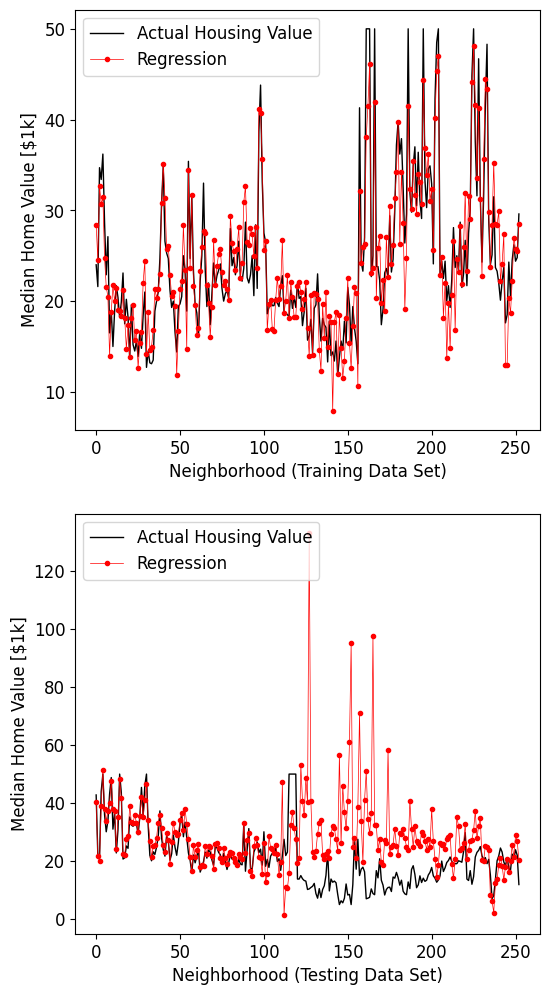

In [6]:
# Plotting
plt.rcParams['figure.figsize'] = [6, 12]

fig = plt.figure()
ax1 = fig.add_subplot(211)

plt.plot(btrain  , color='k', linewidth=1, label='Actual Housing Value') # True relationship
plt.plot(Atrain@x, '-o', color='r', linewidth=0.5, markersize=3, label='Regression')
plt.xlabel('Neighborhood (Training Data Set)')
plt.ylabel('Median Home Value [$1k]')
plt.legend()

ax2 = fig.add_subplot(212)
plt.plot(btest  , color='k', linewidth=1, label='Actual Housing Value') # True relationship
plt.plot(Atest@x, '-o', color='r', linewidth=0.5, markersize=3, label='Regression')
#plt.plot(b  , color='k', linewidth=1, label='Actual Housing Value') # True relationship
#plt.plot(A@x, '-o', color='r', linewidth=0.5, markersize=3, label='Regression')
plt.xlabel('Neighborhood (Testing Data Set)')
plt.ylabel('Median Home Value [$1k]')
plt.legend(loc='upper left')
plt.show()

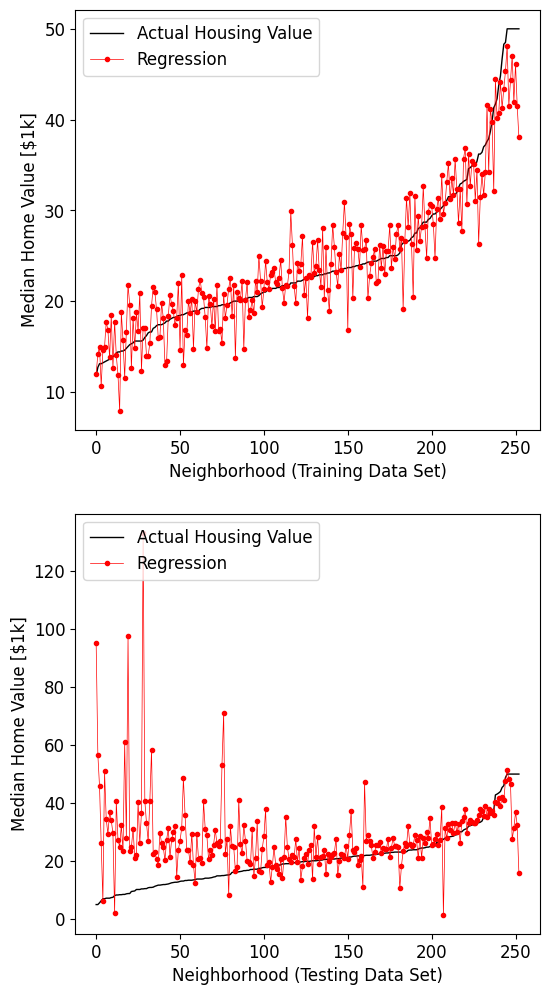

In [7]:
# Plotting
plt.rcParams['figure.figsize'] = [6, 12]

fig = plt.figure()
ax1 = fig.add_subplot(211)

sort_ind = np.argsort(btrain[:])
plt.plot(btrain[sort_ind]  , color='k', linewidth=1, label='Actual Housing Value') # True relationship
plt.plot(Atrain[sort_ind,:]@x, '-o', color='r', linewidth=0.5, markersize=3, label='Regression')
plt.xlabel('Neighborhood (Training Data Set)')
plt.ylabel('Median Home Value [$1k]')
plt.legend()

ax2 = fig.add_subplot(212)
sort_ind = np.argsort(btest[:])
plt.plot(btest[sort_ind]  , color='k', linewidth=1, label='Actual Housing Value') # True relationship
plt.plot(Atest[sort_ind,:]@x, '-o', color='r', linewidth=0.5, markersize=3, label='Regression')
#plt.plot(b  , color='k', linewidth=1, label='Actual Housing Value') # True relationship
#plt.plot(A@x, '-o', color='r', linewidth=0.5, markersize=3, label='Regression')
plt.xlabel('Neighborhood (Testing Data Set)')
plt.ylabel('Median Home Value [$1k]')
plt.legend(loc='upper left')
plt.show()

[ 1.20133313e+00  2.44968593e-02  9.99508089e-03  4.25486717e-01
 -8.44272332e+00  8.87767164e+00 -4.85042221e-02 -1.11980855e+00
  2.03775710e-01 -1.59772357e-02 -6.59747754e-01  1.77705695e-02
 -1.14801037e-01 -1.00174306e+01]


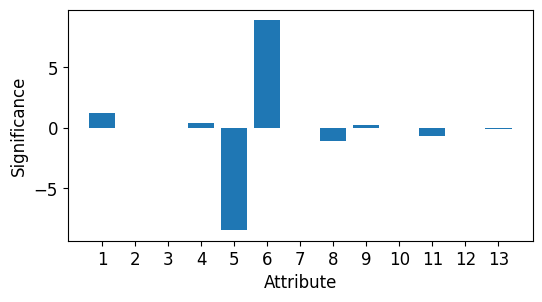

In [8]:
plt.rcParams['figure.figsize'] = [6, 3]

print(x)

#x_tick = range(len(x)-1)+np.ones(len(x)-1)
x_tick = np.arange(1, len(x))

plt.bar(x_tick,x[:-1])
plt.xlabel('Attribute')
plt.ylabel('Significance')
plt.xticks(x_tick)
plt.show()

# Training and Testing The Mixed Data To Validate The Regression Model



We first shuffle the data matrix and use the first half of data (253) for trainign and the rest for testing the regression model.

In [9]:
# To validate the regression model, we use the first 253 houses.

# Load data matrix
H = np.genfromtxt('https://raw.githubusercontent.com/kursatkara/MAE_5020_S24/master/Data/housing.data')
print(H.shape, H.size)
b = H[:,-1] # housing values in $1000s
print(b.shape, b.size)
A = H[:,:-1] # other factors
print(A.shape, A.size)
# To ofset the housing price.
A = np.pad(A,[(0,0),(0,1)],mode='constant',constant_values=1)

n = 253
p = np.random.permutation(506);

A = A[p,:]
b = b[p]

btrain = b[:n]
Atrain = A[:n]

btest = b[n:]
Atest = A[n:]

# SVD
U, S, VT = np.linalg.svd(Atrain,full_matrices=False)

# Solve Ax=b using SVD
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ btrain


(506, 14) 7084
(506,) 506
(506, 13) 6578


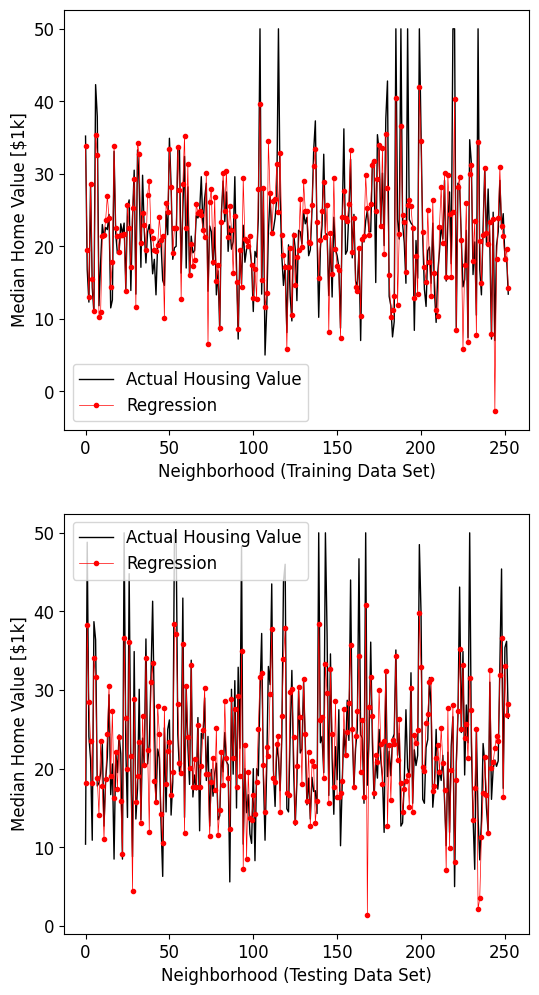

In [10]:
# Plotting
plt.rcParams['figure.figsize'] = [6, 12]

fig = plt.figure()
ax1 = fig.add_subplot(211)

plt.plot(btrain  , color='k', linewidth=1, label='Actual Housing Value') # True relationship
plt.plot(Atrain@x, '-o', color='r', linewidth=0.5, markersize=3, label='Regression')
plt.xlabel('Neighborhood (Training Data Set)')
plt.ylabel('Median Home Value [$1k]')
plt.legend()

ax2 = fig.add_subplot(212)
plt.plot(btest  , color='k', linewidth=1, label='Actual Housing Value') # True relationship
plt.plot(Atest@x, '-o', color='r', linewidth=0.5, markersize=3, label='Regression')
plt.xlabel('Neighborhood (Testing Data Set)')
plt.ylabel('Median Home Value [$1k]')
plt.legend(loc='upper left')
plt.show()

In [11]:
print(x)

[-4.87859759e-02  4.17101422e-02  1.02456813e-01  2.14638826e+00
 -1.67319972e+01  2.93880753e+00 -9.81350669e-03 -1.56305160e+00
  2.07374570e-01 -1.16010360e-02 -8.64908475e-01  1.26618179e-02
 -5.58942256e-01  3.93661944e+01]


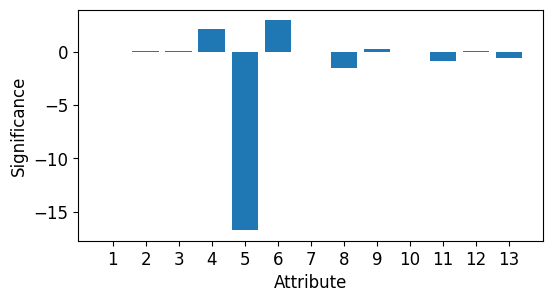

In [12]:
plt.rcParams['figure.figsize'] = [6, 3]

#x_tick = range(len(x)-1)+np.ones(len(x)-1)
x_tick = np.arange(1, len(x))

plt.bar(x_tick,x[:-1])
plt.xlabel('Attribute')
plt.ylabel('Significance')
plt.xticks(x_tick)
plt.show()

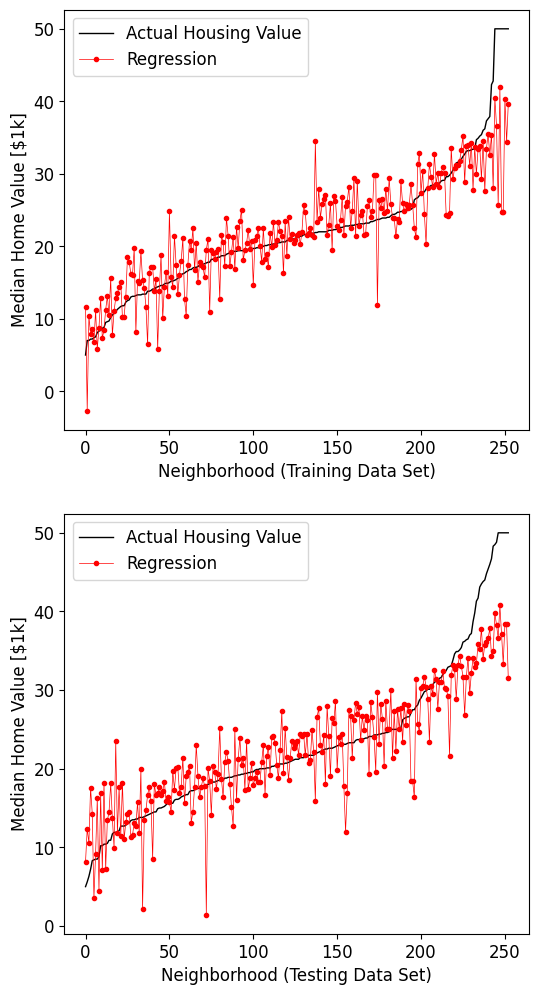

In [13]:
# Plotting
plt.rcParams['figure.figsize'] = [6, 12]

fig = plt.figure()
ax1 = fig.add_subplot(211)

sort_ind = np.argsort(btrain[:])
plt.plot(btrain[sort_ind]  , color='k', linewidth=1, label='Actual Housing Value') # True relationship
plt.plot(Atrain[sort_ind,:]@x, '-o', color='r', linewidth=0.5, markersize=3, label='Regression')
plt.xlabel('Neighborhood (Training Data Set)')
plt.ylabel('Median Home Value [$1k]')
plt.legend()

ax2 = fig.add_subplot(212)
sort_ind = np.argsort(btest[:])
plt.plot(btest[sort_ind]  , color='k', linewidth=1, label='Actual Housing Value') # True relationship
plt.plot(Atest[sort_ind,:]@x, '-o', color='r', linewidth=0.5, markersize=3, label='Regression')
plt.xlabel('Neighborhood (Testing Data Set)')
plt.ylabel('Median Home Value [$1k]')
plt.legend(loc='upper left')
plt.show()